1
Accuracy with 1 layers: 92.78%
2
Accuracy with 2 layers: 92.29%
5
Accuracy with 5 layers: 92.99%
10
Accuracy with 10 layers: 94.06%
20
Accuracy with 20 layers: 94.68%
30
Accuracy with 30 layers: 91.6%
60
Accuracy with 60 layers: 80.64%
120
Accuracy with 120 layers: 10.42%


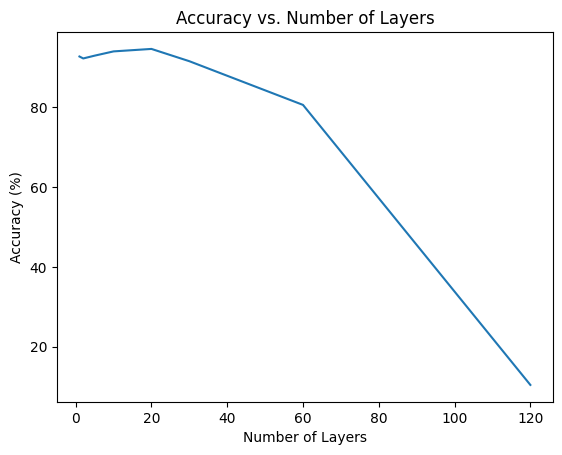

In [ ]:
# Fully Connected on MNIST with Skipconnection
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class FullyConnectedWithSkip(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_layers):
        super(FullyConnectedWithSkip, self).__init__()

        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        self.layers.append(nn.Linear(input_dim, hidden_dim))

        for i in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))

        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = x

        for i in range(self.num_layers):
            out1 = self.layers[i](out)
            out1 = nn.LeakyReLU(0.2)(out1)

            if i > 1:
                out1 += out
            out=out1

        return self.output(out1)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
layers_list = [1, 2, 5, 10, 20, 30,60,120]
accuracy_list_res = []

for num_layers in layers_list:
    print(num_layers)
    model = FullyConnectedWithSkip(28*28, 10, 32, num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(2):
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs = inputs.view(-1, 28*28)

            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 28*28)
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy with {num_layers} layers: {accuracy}%")
    accuracy_list_res.append(accuracy)

# Grafico
plt.plot(layers_list, accuracy_list_res)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Layers')
plt.show()

1
Accuracy with 1 layers: 91.06%
2
Accuracy with 2 layers: 91.43%
5
Accuracy with 5 layers: 90.86%
10
Accuracy with 10 layers: 81.65%
20
Accuracy with 20 layers: 56.45%
30
Accuracy with 30 layers: 9.74%
60
Accuracy with 60 layers: 9.74%
120
Accuracy with 120 layers: 10.32%


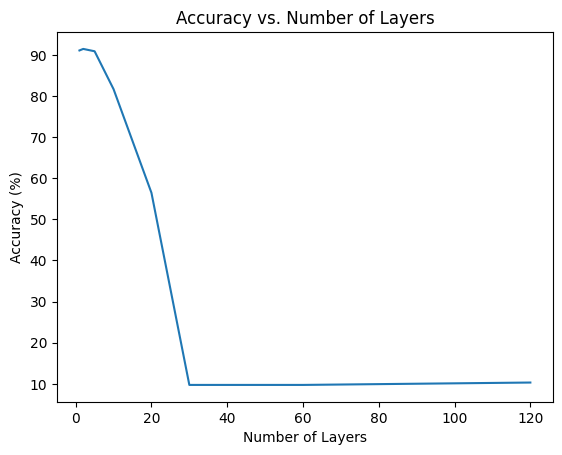

In [ ]:
#Fully connected without skips on MNIST

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class FullyConnectedWithoutSkip(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_layers):
        super(FullyConnectedWithSkip, self).__init__()

        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        # Aggiungi il primo layer
        self.layers.append(nn.Linear(input_dim, hidden_dim))

        # Aggiungi gli hidden layers
        for i in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))

        # Aggiungi l'ultimo layer
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = x

        for i in range(self.num_layers):
            out1 = self.layers[i](out)
            out1 = nn.LeakyReLU(0.2)(out1)

            #if i > 1:  # deactivated skip connection
              #  out1 += out
            out=out1

        return out1

# Preparazione dei dati
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

# Variabili per graficare
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
layers_list = [1, 2, 5, 10, 20, 30,60,120]
accuracy_list_fc = []

for num_layers in layers_list:
    print(num_layers)
    model = FullyConnectedWithoutSkip(28*28, 10, 32, num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Addestramento
    for epoch in range(2):
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs = inputs.view(-1, 28*28)

            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()

    # Test
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 28*28)
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy with {num_layers} layers: {accuracy}%")
    accuracy_list_fc.append(accuracy)

# Grafico
plt.plot(layers_list, accuracy_list_fc)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Layers')
plt.show()

1
Accuracy with 1 layers: 92.68%
2
Accuracy with 2 layers: 92.54%
5
Accuracy with 5 layers: 93.37%
10
Accuracy with 10 layers: 93.71%
20
Accuracy with 20 layers: 94.27%
30
Accuracy with 30 layers: 93.54%
60
Accuracy with 60 layers: 93.29%
120
Accuracy with 120 layers: 92.17%


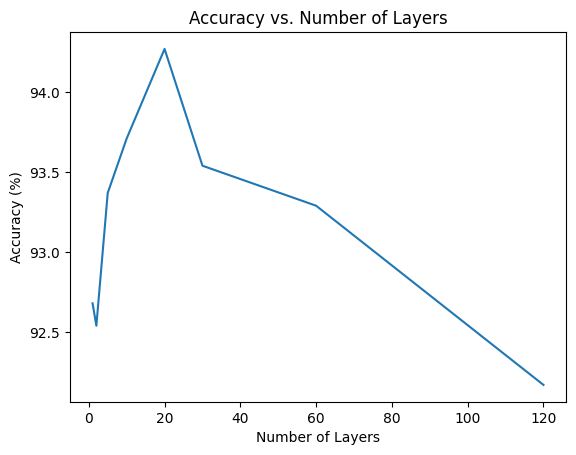

In [ ]:
# GloNet network

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class FullyConnectedGloNet(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_layers):
        super(FullyConnectedWithSkip, self).__init__()

        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        self.layers.append(nn.Linear(input_dim, hidden_dim))

        for i in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))

        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, out2= x, 0


        for i in range(self.num_layers):
            out1 = self.layers[i](out)
            out1 = nn.LeakyReLU(0.2)(out1)

            #if i > 1:  # deactivated skip
              #  out1 += out
            out=out1
            out2+=out1 # GloNet Head accumulation


        return self.output(out2)

# Preparazione dei dati
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

# Variabili per graficare
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
layers_list = [1, 2, 5, 10, 20, 30,60,120]
accuracy_list = []

for num_layers in layers_list:
    print(num_layers)
    model = FullyConnectedGloNet(28*28, 10, 32, num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Addestramento
    for epoch in range(2):
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs = inputs.view(-1, 28*28)

            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()

    # Test
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 28*28)
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy with {num_layers} layers: {accuracy}%")
    accuracy_list.append(accuracy)

# Grafico
plt.plot(layers_list, accuracy_list)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Layers')
plt.show()

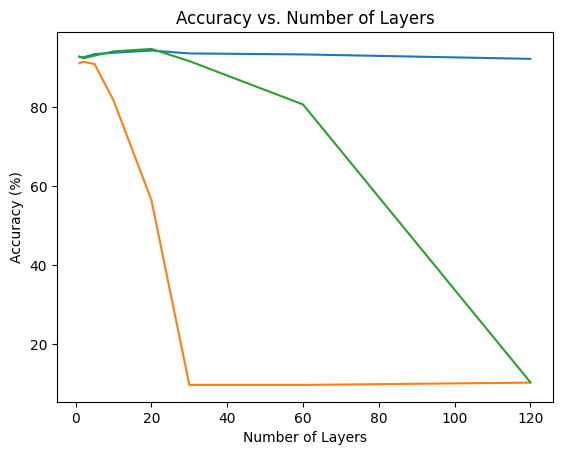

In [ ]:
plt.plot(layers_list, accuracy_list)
plt.plot(layers_list, accuracy_list_fc)
plt.plot(layers_list, accuracy_list_res)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Layers')
plt.show()

# GloNet with a variable number of layer
### We use early exits to value network's accuracy

100


100%|██████████| 20/20 [10:21<00:00, 31.06s/it]


Accuracy with 100 layers: 95.84%


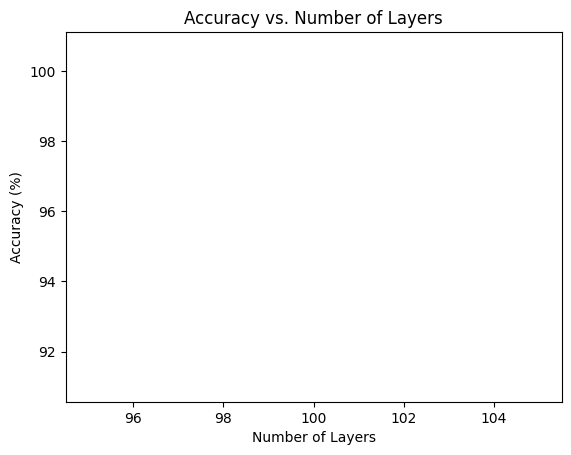

In [ ]:
num_layers = 100

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class FullyConnectedGloNet(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_layers):
        super(FullyConnectedWithSkip, self).__init__()

        self.layers = nn.ModuleList()
        self.num_layers = num_layers
        self.relu = nn.ReLU()

        self.layers.append(nn.Linear(input_dim, hidden_dim))

        for i in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))

        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, out2= x, 0

        for i in range(self.num_layers):
            out1 = self.layers[i](out)
            out1 = self.relu(out1)

            #if i > 1:  # without skip connections
              #  out1 += out
            out=out1
            out2+=out1

        return self.output(out2)

    def forward_k(self, x, k):
        out, out2= x, 0

        for i in range(k):
            out1 = self.layers[i](out)
            out1 = self.relu(out1)
             #if i > 1:  # without skip connections
              #  out1 += out
            out=out1
            out2+=out1

        return self.output(out2)

    def forward_std_k(self, x, k):
        out, out2= x, 0

        for i in range(k):
            out1 = self.layers[i](out)
            out1 = self.relu(out1)
             #if i > 1:  # without skip connections
              #  out1 += out
            out=out1
           # out2+=out1

        return out1


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
layers_list = [num_layers]
accuracy_list = []
lambda_l1 = 0.0001

for num_layers in layers_list:
    print(num_layers)
    model = FullyConnectedWithSkip(28*28, 10, 32, num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in tqdm(range(20)):
        if (epoch==300):
                optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs = inputs.view(-1, 28*28)

            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
           # l1_norm = sum(p.abs().sum() for p in model.parameters() if p.requires_grad and p.dim() > 1)
            l2_norm = sum((p**2).sum() for p in model.parameters() if p.requires_grad and p.dim() > 1).sqrt()


            loss = loss + lambda_l1 * l2_norm
            loss.backward()
            optimizer.step()

    # Test
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 28*28)
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy with {num_layers} layers: {accuracy}%")
    accuracy_list.append(accuracy)

# Grafico
plt.plot(layers_list, accuracy_list)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Layers')
plt.show()

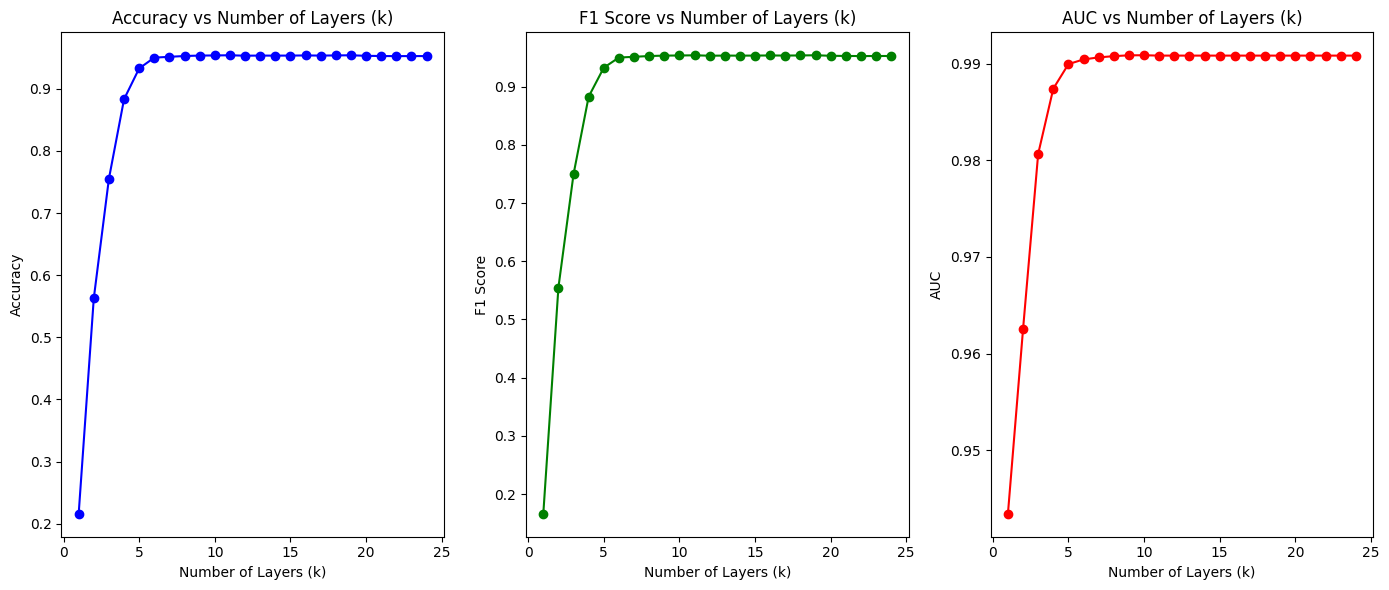

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, 25), accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Number of Layers (k)')
plt.xlabel('Number of Layers (k)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(range(1,25), f1_scores, marker='o', linestyle='-', color='green')
plt.title('F1 Score vs Number of Layers (k)')
plt.xlabel('Number of Layers (k)')
plt.ylabel('F1 Score')

plt.subplot(1, 3, 3)
plt.plot(range(1,25), auc_scores, marker='o', linestyle='-', color='red')
plt.title('AUC vs Number of Layers (k)')
plt.xlabel('Number of Layers (k)')
plt.ylabel('AUC')

plt.tight_layout()
plt.show()
